In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading in full data set
# brfss_total = pd.read_csv("../csv_data/brfss_total.csv")
brfss_total = pd.read_csv("./brfss_total.csv", index_col=0)

In [ ]:
brfss_total.head()

,_STATE,DISPCODE,PHYSHLTH,MENTHLTH,USENOW3,HISPANC2,MARITAL,CHILDREN,EMPLOY,RENTHOM1,SEX,QLACTLM2,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,MSCODE,_IMPAGE,_RFHLTH,_SMOKER3,_PRACE,_EDUCAG,_INCOMG,_TOTINDA
0,5.0,110.0,0.0,0.0,3.0,2.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,53.0,1.0,4.0,1.0,3.0,5.0,1.0
1,5.0,110.0,15.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,5.0,64.0,2.0,3.0,1.0,2.0,2.0,1.0
2,5.0,110.0,6.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,58.0,1.0,4.0,1.0,3.0,2.0,1.0
3,5.0,110.0,30.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,76.0,2.0,4.0,1.0,1.0,0.0,2.0
4,5.0,110.0,13.0,0.0,3.0,2.0,3.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,82.0,2.0,3.0,1.0,2.0,0.0,2.0


In [ ]:
# just making sure no nulls are present
brfss_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117555 entries, 0 to 117554
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    117555 non-null  float64
 1   DISPCODE  117555 non-null  float64
 2   PHYSHLTH  117555 non-null  float64
 3   MENTHLTH  117555 non-null  float64
 4   USENOW3   117555 non-null  float64
 5   HISPANC2  117555 non-null  float64
 6   MARITAL   117555 non-null  float64
 7   CHILDREN  117555 non-null  float64
 8   EMPLOY    117555 non-null  float64
 9   RENTHOM1  117555 non-null  float64
 10  SEX       117555 non-null  float64
 11  QLACTLM2  117555 non-null  float64
 12  ACEDEPRS  117555 non-null  float64
 13  ACEDRINK  117555 non-null  float64
 14  ACEDRUGS  117555 non-null  float64
 15  ACEPRISN  117555 non-null  float64
 16  ACEDIVRC  117555 non-null  float64
 17  ACEPUNCH  117555 non-null  float64
 18  ACEHURT   117555 non-null  float64
 19  ACESWEAR  117555 non-null  float64
 20  ACET

In [ ]:
np.random.seed(151)

In [ ]:
# creating X variable with all features
X_ace = brfss_total[['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT', 'ACESWEAR', 
                       'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']]

In [ ]:
# creating the 4 y's
y_tobacco = brfss_total['USENOW3']
y_activity = brfss_total['QLACTLM2']
y_health = brfss_total['_RFHLTH']
y_smoker = brfss_total['_SMOKER3']

In [ ]:
#original baseline for tobacco
y_tobacco.value_counts(normalize=True)

3.0    0.966560
1.0    0.017872
2.0    0.012990
0.0    0.002578
Name: USENOW3, dtype: float64

In [ ]:
#original baseline for activity
y_activity.value_counts(normalize=True)

2.0    0.724520
1.0    0.268997
0.0    0.006482
Name: QLACTLM2, dtype: float64

In [ ]:
#original baseline for health
y_health.value_counts(normalize=True)

1.0    0.814742
2.0    0.181991
0.0    0.003267
Name: _RFHLTH, dtype: float64

In [ ]:
#original baseline for smoker
y_smoker.value_counts(normalize=True)

4.0    0.521569
3.0    0.308324
1.0    0.119604
2.0    0.044226
0.0    0.006278
Name: _SMOKER3, dtype: float64

In [ ]:
# turning the nominal columns into strings so they can be dummified
X_ace = X_ace.astype(str)

In [ ]:
# dummifying nominal variables for X_all
X_ace = pd.get_dummies(X_ace, drop_first=True)
X_ace.head()

,ACEDEPRS_1.0,ACEDEPRS_2.0,ACEDRINK_1.0,ACEDRINK_2.0,ACEDRUGS_1.0,ACEDRUGS_2.0,ACEPRISN_1.0,ACEPRISN_2.0,ACEDIVRC_1.0,ACEDIVRC_2.0,ACEPUNCH_1.0,ACEPUNCH_2.0,ACEPUNCH_3.0,ACEHURT_1.0,ACEHURT_2.0,ACEHURT_3.0,ACESWEAR_1.0,ACESWEAR_2.0,ACESWEAR_3.0,ACETOUCH_1.0,ACETOUCH_2.0,ACETOUCH_3.0,ACETTHEM_1.0,ACETTHEM_2.0,ACETTHEM_3.0,ACEHVSEX_1.0,ACEHVSEX_2.0,ACEHVSEX_3.0
0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
X_ace.shape

(117555, 28)

In [ ]:
# to compensate for unbalanced classes in my y's will use SMOTE

sm = SMOTE(random_state=151)
X_ace1, y_tobacco = sm.fit_resample(X_ace, y_tobacco)

sm2 = SMOTE(random_state=151)
X_ace2, y_activity = sm2.fit_resample(X_ace, y_activity)

sm3 = SMOTE(random_state=151)
X_ace3, y_health = sm3.fit_resample(X_ace, y_health)

sm4 = SMOTE(random_state=151)
X_ace4, y_smoker = sm4.fit_resample(X_ace, y_smoker)

In [ ]:
#y_tobacco.value_counts(normalize=True)

In [ ]:
#y_activity.value_counts(normalize=True)

In [ ]:
#y_health.value_counts(normalize=True)

In [ ]:
#y_smoker.value_counts(normalize=True)

In [ ]:
# looks like with SMOTE resampling, data set has increased about 4x
X_ace1.shape

(454496, 28)

In [ ]:
# creating training and testing sets for all y's
X_train_ace, X_test_ace, y_train_tobacco, y_test_tobacco = train_test_split(X_ace1, y_tobacco, random_state = 151, stratify=y_tobacco)
X_train_ace2, X_test_ace2, y_train_activity, y_test_activity = train_test_split(X_ace2, y_activity, random_state = 151, stratify=y_activity)
X_train_ace3, X_test_ace3, y_train_health, y_test_health = train_test_split(X_ace3, y_health, random_state = 151, stratify=y_health)
X_train_ace4, X_test_ace4, y_train_smoker, y_test_smoker = train_test_split(X_ace4, y_smoker, random_state = 151, stratify=y_smoker)

In [ ]:
X_train_ace.shape

(340872, 28)

In [ ]:
y_train_tobacco.shape

(340872,)

In [ ]:
ace_tobacco_rfc = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300)
ace_tobacco_rfc.fit(X_train_ace, y_train_tobacco)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pipe_ace_activity = make_pipeline(SelectKBest(f_classif, k=25), ExtraTreesClassifier(max_depth=None, n_estimators=100))
pipe_ace_activity.fit(X_train_ace2, y_train_activity)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=25,
                             score_func=<function f_classif at 0x7fc28d094e18>)),
                ('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
   

In [ ]:
ace_health_etc = ExtraTreesClassifier(max_depth=None, min_samples_leaf = 1, min_samples_split = 3,  n_estimators=10)
ace_health_etc.fit(X_train_ace3, y_train_health)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
pipe_ace_smoker = make_pipeline(SelectKBest(f_classif, k=25), RandomForestClassifier(max_depth=None, n_estimators=500))
pipe_ace_smoker.fit(X_train_ace4, y_train_smoker)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=25,
                             score_func=<function f_classif at 0x7fc28d094e18>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, w

In [ ]:
# getting predictions for each model
tobacco_ace_preds = ace_tobacco_rfc.predict(X_test_ace)
activity_ace_preds = pipe_ace_activity.predict(X_test_ace2)
health_ace_preds = ace_health_etc.predict(X_test_ace3)
smoker_ace_preds = pipe_ace_smoker.predict(X_test_ace4)

# calculating the precision score for each model
tobacco_ace_prec = precision_score(y_test_tobacco, tobacco_ace_preds, average='micro')
activity_ace_prec = precision_score(y_test_activity, activity_ace_preds, average='micro')
health_ace_prec = precision_score(y_test_health, health_ace_preds, average='micro')
smoker_ace_prec = precision_score(y_test_smoker, smoker_ace_preds, average='micro')

In [ ]:
print(f'training accuracy for tobacco: {ace_tobacco_rfc.score(X_train_ace, y_train_tobacco)}')
print(f'testing accuracy for tobacco: {ace_tobacco_rfc.score(X_test_ace, y_test_tobacco)}')
print(f'Precision for tobacco: {tobacco_ace_prec}')

training accuracy for tobacco: 0.6324045389471707
testing accuracy for tobacco: 0.6177656128986834
Precision for tobacco: 0.6177656128986834


In [ ]:
print(f'training accuracy for activity: {pipe_ace_activity.score(X_train_ace2, y_train_activity)}')
print(f'testing accuracy for activity: {pipe_ace_activity.score(X_test_ace2, y_test_activity)}')
print(f'Precision for activity: {activity_ace_prec}')

training accuracy for activity: 0.6014225033136082
testing accuracy for activity: 0.5873135146135663
Precision for activity: 0.5873135146135663


In [ ]:
print(f'training accuracy for health: {ace_health_etc.score(X_train_ace3, y_train_health)}')
print(f'testing accuracy for health: {ace_health_etc.score(X_test_ace3, y_test_health)}')
print(f'Precision for health: {health_ace_prec}')

training accuracy for health: 0.5592395289051406
testing accuracy for health: 0.5453203959183105
Precision for health: 0.5453203959183105


In [ ]:
print(f'training accuracy for smoker: {pipe_ace_smoker.score(X_train_ace4, y_train_smoker)}')
print(f'testing accuracy for smoker: {pipe_ace_smoker.score(X_test_ace4, y_test_smoker)}')
print(f'Precision for smoker: {smoker_ace_prec}')

training accuracy for smoker: 0.4531734537214633
testing accuracy for smoker: 0.4133242869444952
Precision for smoker: 0.4133242869444952


In [ ]:
# getting features importances for smokeless tobacco use
tobacco_ace_df = pd.DataFrame({'features': X_ace.columns.values, 'importance': ace_tobacco_rfc.feature_importances_})
tobacco_ace_df = tobacco_ace_df.sort_values('importance', ascending = False)

tobacco_ace_df.head()

,features,importance
25,ACEHVSEX_1.0,0.117301
7,ACEPRISN_2.0,0.102720
22,ACETTHEM_1.0,0.097941
19,ACETOUCH_1.0,0.074312
5,ACEDRUGS_2.0,0.069027



*   ACEHVSEX = 1 = Never
*   ACEPRISN = 2 = No
*   ACETTHEM = 1 = Never
*   ACETOUCH = 1 = Never
*   ACEDRUGS = 2 = No












In [ ]:
tobacco_ace_df.tail()

,features,importance
24,ACETTHEM_3.0,0.007549
27,ACEHVSEX_3.0,0.005196
20,ACETOUCH_2.0,0.004747
23,ACETTHEM_2.0,0.003580
26,ACEHVSEX_2.0,0.003204



*   ACETTHEM = 3 = More than once
*   ACEHVSEX = 3 = More than once
*   ACETOUCH = 2 = More than once
*   ACETTHEM = 2 = Once
*   ACEHVSEX = 2 = Once

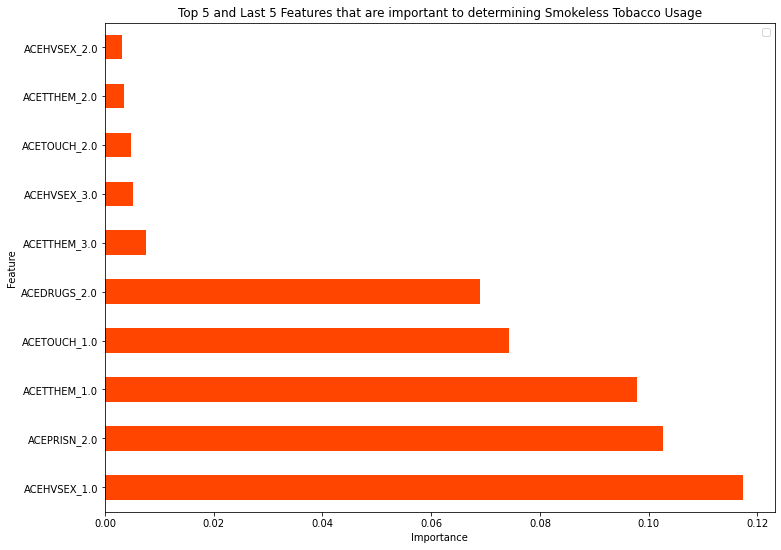

In [ ]:
def top_bottom(df, color):
  ''' Function to graph Top 5 and Last 5 Features based on importance'''
  top_bottom = pd.merge(df.head(), df.tail(), how='outer')
  top_bottom.plot(kind='barh', figsize=(12, 9), color=color)
  plt.yticks(ticks=top_bottom.index, labels=top_bottom.features)
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.legend([]);
  return

top_bottom(tobacco_ace_df, color = 'orangered')
plt.title('Top 5 and Last 5 Features that are important to determining Smokeless Tobacco Usage');

plt.savefig('tobacco_ace_ungrouped.jpg')

In [ ]:
# getting features importances for self-reported health
health_ace_df = pd.DataFrame({'features': X_ace.columns.values, 'importance': ace_health_etc.feature_importances_})
health_ace_df = health_ace_df.sort_values('importance', ascending = False)

health_ace_df.head()

,features,importance
10,ACEPUNCH_1.0,0.083535
19,ACETOUCH_1.0,0.068936
9,ACEDIVRC_2.0,0.067345
13,ACEHURT_1.0,0.062755
16,ACESWEAR_1.0,0.062616


*   ACEPUNCH = 1 = Never
*   ACETOUCH = 1 = Never
*   ACEDIVRC = 2 = No
*   ACEHURT = 1 = Never
*   ACESWEAR = 1 = Never

In [ ]:
# looking at last 10
health_ace_df.tail()

,features,importance
11,ACEPUNCH_2.0,0.013718
24,ACETTHEM_3.0,0.012401
27,ACEHVSEX_3.0,0.011179
23,ACETTHEM_2.0,0.010953
26,ACEHVSEX_2.0,0.008361


*   ACEPUNCH = 2 = Once
*   ACETTHEM = 3 = More than once
*   ACEHVSEX = 3 = More than once
*   ACETTHEM = 2 = Once
*   ACEHVSEX = 2 = Once

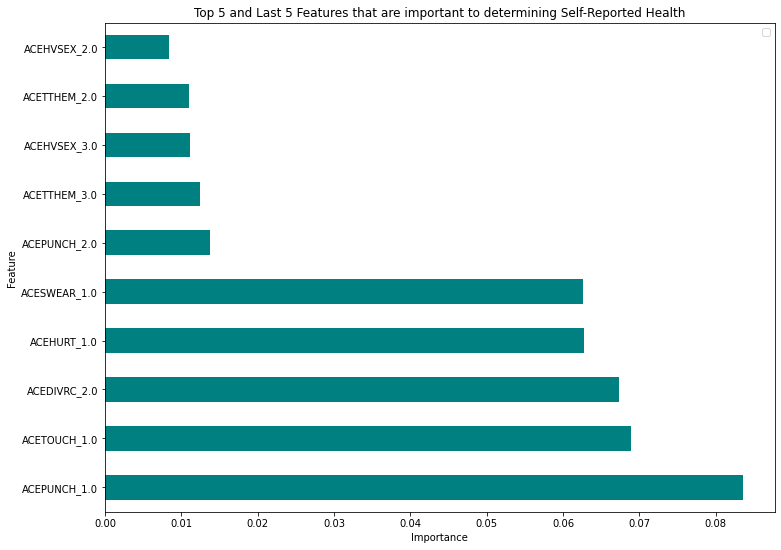

In [ ]:
top_bottom(health_ace_df, color='teal')
plt.title('Top 5 and Last 5 Features that are important to determining Self-Reported Health');

plt.savefig('health_ace_ungrouped.jpg')

In [ ]:
# getting features selected by 'selectkbest' for other two y's
features_activity_ace = pipe_ace_activity.named_steps['selectkbest'].get_support(indices=True) 
features_smoker_ace = pipe_ace_smoker.named_steps['selectkbest'].get_support(indices=True) 

In [ ]:
# getting column names for features selected by 'selectkbest' for other two y's
X_cols_activity_ace = X_ace.columns.values[features_activity_ace]
X_cols_smoker_ace = X_ace.columns.values[features_smoker_ace]

In [ ]:
# getting each feature's importance for other two y's
coefs_activity_ace = pipe_ace_activity.named_steps['extratreesclassifier'].feature_importances_
coefs_smoker_ace = pipe_ace_smoker.named_steps['randomforestclassifier'].feature_importances_

In [ ]:
# feature importances for self-reported health
activity_ace = pd.DataFrame({'features': X_cols_activity_ace, 'importance': coefs_activity_ace})
activity_ace = activity_ace.sort_values('importance', ascending = False)
activity_ace.head()

,features,importance
9,ACEPUNCH_1.0,0.079468
12,ACEHURT_1.0,0.078321
18,ACETOUCH_1.0,0.072899
6,ACEPRISN_2.0,0.069199
5,ACEDRUGS_2.0,0.061508


*   ACEPUNCH = 1 = Never
*   ACEHURT = 1 = Never
*   ACETOUCH = 1 = Never
*   ACEPRISN = 2 = No
*   ACEDRUGS = 2 = No

In [ ]:
activity_ace.tail()

,features,importance
13,ACEHURT_2.0,0.014490
21,ACETTHEM_2.0,0.013146
16,ACESWEAR_2.0,0.012938
22,ACETTHEM_3.0,0.012750
24,ACEHVSEX_3.0,0.012089


*   ACEHURT = 2 = Once
*   ACETTHEM = 2 = Once
*   ACESWEAR = 2 = Once
*   ACETTHEM = 3 = More than once
*   ACEHVSEX = 3 = More than once



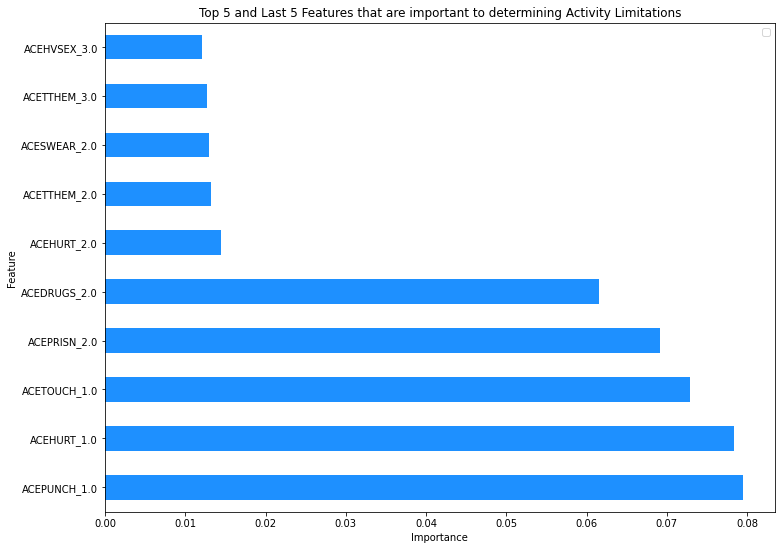

In [ ]:
top_bottom(activity_ace, color = 'dodgerblue')
plt.title('Top 5 and Last 5 Features that are important to determining Activity Limitations');

plt.savefig('activity_ace_ungrouped.jpg')

In [ ]:
# feature importances for smoker status
smoker_ace = pd.DataFrame({'features': X_cols_smoker_ace, 'importance':coefs_smoker_ace})
smoker_ace = smoker_ace.sort_values('importance', ascending = False)
smoker_ace.head()

,features,importance
23,ACEHVSEX_1.0,0.073410
7,ACEPRISN_2.0,0.070969
19,ACETOUCH_1.0,0.068351
21,ACETTHEM_1.0,0.062602
10,ACEPUNCH_1.0,0.061759


*   ACEHVSEX = 1 = Never
*   ACEPRISN = 2 = No
*   ACETOUCH = 1 = Never
*   ACETTHEM = 1 = Never
*   ACEPUNCH = 1 = Never

In [ ]:
smoker_ace.tail()

,features,importance
22,ACETTHEM_3.0,0.021651
11,ACEPUNCH_2.0,0.018771
17,ACESWEAR_2.0,0.018029
14,ACEHURT_2.0,0.017944
24,ACEHVSEX_3.0,0.014772


*   ACETTHEM = 3 = More than once
*   ACEPUNCH = 2 = Once
*   ACEPRISN = 2 = No
*   ACETOUCH = 2 = Once
*   ACEHVSEX = 3 = More than once




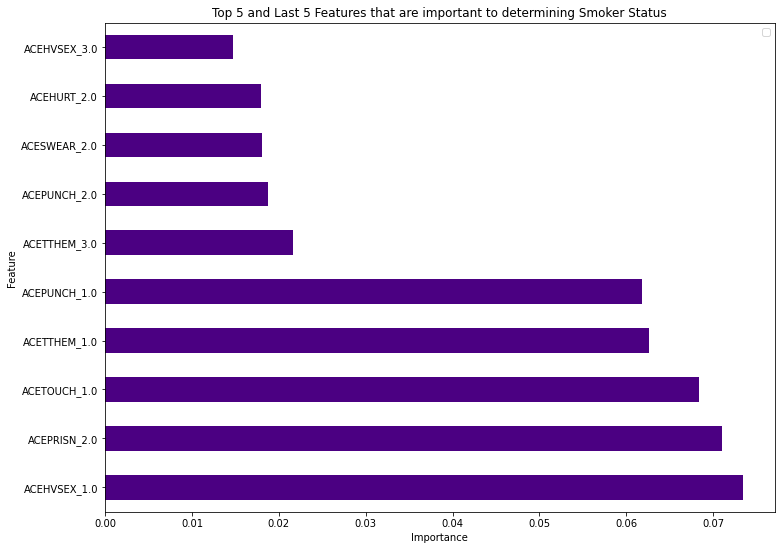

In [ ]:
top_bottom(smoker_ace, color='indigo')
plt.title('Top 5 and Last 5 Features that are important to determining Smoker Status');

plt.savefig('smoker_ace_ungrouped.jpg')